In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import os

GENERATION

In [3]:
df_P_stats = pd.read_csv("P_stats.csv")
df_P= pd.read_csv("P.csv")
df_WS= pd.read_csv("WS.csv")
df_WS_stats= pd.read_csv("WS_stats.csv")
df_P['time'] = pd.to_datetime(df_P['time'], utc=True) 

In [38]:
def filter_on_year(df: pd.DataFrame, year: int):
    """This functions filters a dataframe on a year using the utc_timestamp column.

    Args:
        year (int): year e.g. 2017
    Return:
        df: a dataframe filter on the year parameter
    """
    return df[df['time'].dt.year == year]

sel_year= 2020
# sel_year= range(2017,2018)
for year in sel_year:
df_sel_year= filter_on_year(df=df_P, year=sel_year)
# print(df_2012)

plt.plot(df_sel_year.index, df_sel_year['BFH_LW_1']*50)
plt.plot(df_sel_year.index, df_sel_year['BFH_LW']*50)
plt.show()

Pow_out= sum(df_sel_year['BFH_LW']*50)
P_rated= 50
Ann_max_pow_out= P_rated*8784
CF=  (Pow_out/ Ann_max_pow_out)
FLH= CF*8783
print(Pow_out, FLH, CF, Ann_max_pow_out)

IndentationError: expected an indented block (1747220791.py, line 14)

ECONOMICAL ANALYSIS

In [4]:
df = pd.read_csv("time_series_60min_singleindex.csv")
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], utc=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


17545     -453.652283
17546     -736.652283
17547    -1085.652283
17548     -951.652283
17549     -563.652283
             ...     
26300    13940.347717
26301    14171.347717
26302    14538.347717
26303    14777.347717
26304    15760.347717
Length: 8760, dtype: float64
17545     -453.652283
17546     -736.652283
17547    -1085.652283
17548     -951.652283
17549     -563.652283
             ...     
26300    13940.347717
26301    14171.347717
26302    14538.347717
26303    14777.347717
26304    15760.347717
Length: 8760, dtype: float64


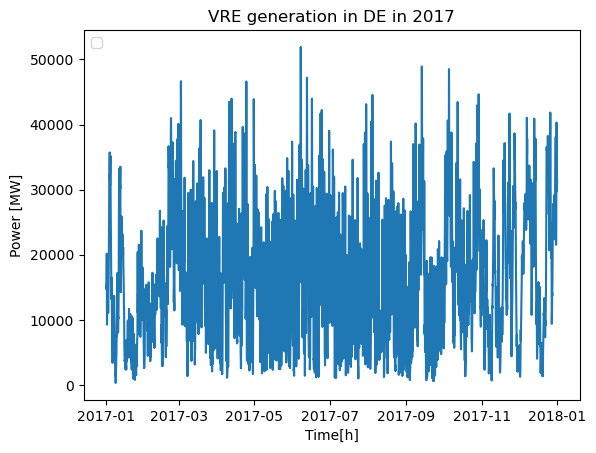

In [36]:
def filter_on_year(df: pd.DataFrame, year: int):
    """This functions filters a dataframe on a year using the utc_timestamp column.

    Args:
        year (int): year e.g. 2017
    Return:
        df: a dataframe filter on the year parameter
    """
    return df[df['utc_timestamp'].dt.year == year]

def vre_share(df_vre: pd.DataFrame, country: str = "DE", year_vre: int = 2017):
    """it calculates the VRE for a country.

    Args:
        df (pd.DataFrame): df filtered on a year.
        country (str, optional): country code for dataframe column. Defaults to "DE".
        year_vre (int): the year for the vre

    Returns:
        _type_: _description_
    """
    # GERMANTY 2017: base example
    df_vre = filter_on_year(df=df_vre, year=year_vre)
    x=df_vre['utc_timestamp']
    y1 =df_vre[f"{country}_wind_offshore_generation_actual"]
    y2 =df_vre[f"{country}_wind_onshore_generation_actual"]
    y3 =df_vre[f"{country}_solar_generation_actual"]

    VRE_sum = y1+y2+y3
    arr_VRE_sum_avg = np.full_like(VRE_sum, VRE_sum.mean())
    # arr_VRE_sum_avg[17545:26305+1] = VRE_sum_avg
    y4 = arr_VRE_sum_avg
    
    # plt.stackplot(x, y1, y2, y3, labels=['Off', 'On', 'Sol'])
    plt.title(f'VRE generation in {country} in {year_vre}')
    plt.xlabel('Time[h]')
    plt.ylabel('Power [MW]')
    plt.legend(loc='upper left')
    # plt.show()
    

    # plt.plot(x, y4, label = "Qavg")
    plt.plot(x, VRE_sum)
    plt.title(f'VRE generation in {country} in {year_vre}')
    plt.xlabel('Time[h]')
    plt.ylabel('Power [MW]')
    plt.legend(loc='upper left')
    # plt.show()
    
    Q_p= VRE_sum-arr_VRE_sum_avg
    print(Q_p)
    # VRE_sum = pd.Series(y1) + pd.Series(y2) + pd.Series(y3)
    
    return Q_p #, VRE_sum_avg #if i put the ys, it returns a list

# for year in range(2017,2018):
year = 2017
# VRE_sum_de = vre_share(df_vre=df, country= "DE", year_vre=year)
# VRE_sum_dk_2= vre_share(df_vre=df, country= "DK_2", year_vre=year)
Q_p_out= vre_share(df_vre=df, country= "DE", year_vre=year)
print(Q_p_out)

def normalized_vre(vre):
    """normalizes the VRE generation with max"""
    return vre / np.max(vre)

def normalized_spot(df_spot: pd.DataFrame):
    """normalizes with mean"""
    sp=df_spot["Day Ahead Auction"].drop(0)
    return sp/sp.mean()

VRE_sum_de_norm = normalized_vre(VRE_sum_de)
VRE_sum_dk_2_norm = normalized_vre(VRE_sum_dk_2)

# df_SPL_normalized = normalized_spot(df_SPL)